In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
! pip install imbalanced-learn
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [429]:
data = pd.read_csv("C:\\Users\\kamlesh prajapat\\OneDrive\\Desktop\\Books\\Internship\\internet_service_churn.csv")
data

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [3]:
data.shape

(72274, 11)

In [4]:
data.dtypes

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

In [5]:
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [7]:
data.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [8]:
data.duplicated().sum()

0

# EDA

1    58922
0    13352
Name: is_tv_subscriber, dtype: int64

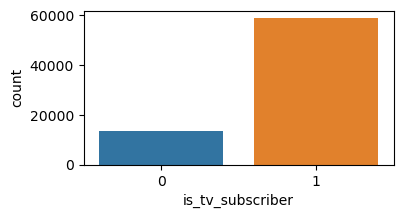

In [9]:
plt.figure(figsize=(4,2))
sns.countplot(data['is_tv_subscriber'])
data['is_tv_subscriber'].value_counts()

0    48089
1    24185
Name: is_movie_package_subscriber, dtype: int64

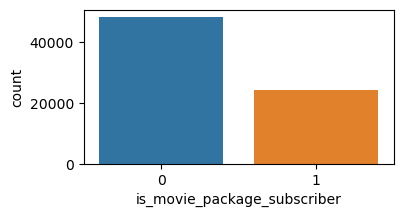

In [10]:
plt.figure(figsize=(4,2))
sns.countplot(data['is_movie_package_subscriber'])
data['is_movie_package_subscriber'].value_counts()

1    40050
0    32224
Name: churn, dtype: int64

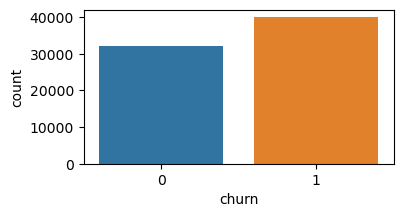

In [11]:
plt.figure(figsize=(4,2))
sns.countplot(data['churn'])
data['churn'].value_counts()

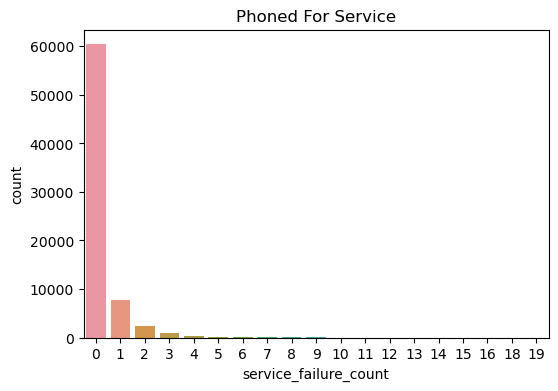

In [96]:
plt.figure(figsize = (6,4))
sns.countplot(data = data, x = 'service_failure_count')
plt.title('Phoned For Service')
plt.show()

<AxesSubplot:xlabel='reamining_contract', ylabel='Density'>

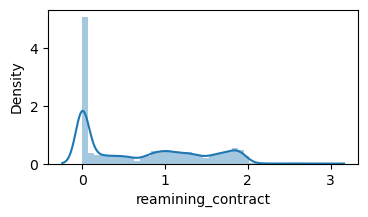

In [12]:
plt.figure(figsize=(4,2))
sns.distplot(data['reamining_contract'])

<AxesSubplot:xlabel='subscription_age', ylabel='Density'>

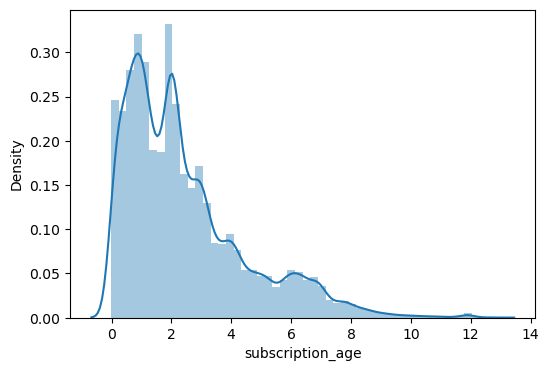

In [13]:
plt.figure(figsize=(6,4))
sns.distplot(data['subscription_age'])

<AxesSubplot:xlabel='bill_avg', ylabel='Density'>

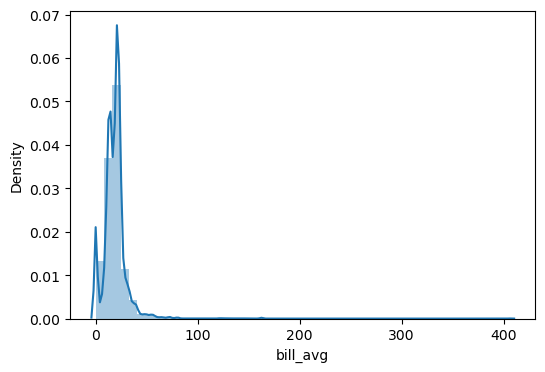

In [14]:
plt.figure(figsize=(6,4))
sns.distplot(data['bill_avg'])

<AxesSubplot:xlabel='service_failure_count', ylabel='Density'>

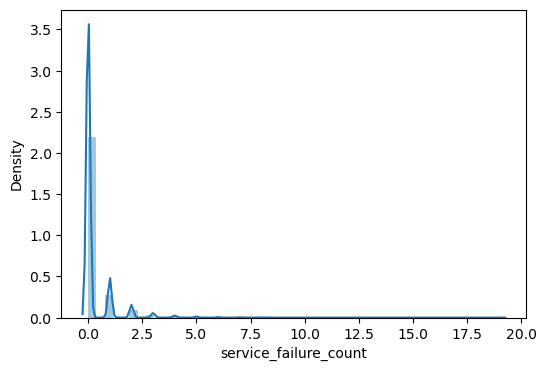

In [15]:
plt.figure(figsize=(6,4))
sns.distplot(data['service_failure_count'])

<AxesSubplot:xlabel='download_over_limit', ylabel='Density'>

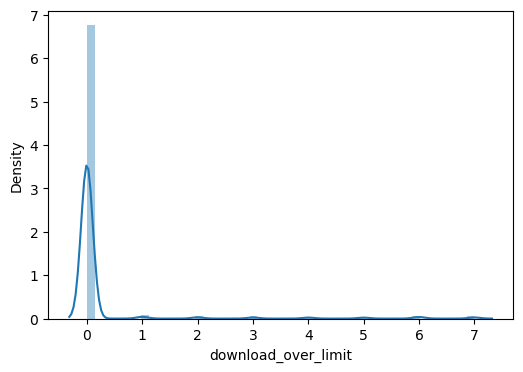

In [16]:
plt.figure(figsize=(6,4))
sns.distplot(data['download_over_limit'])

<AxesSubplot:xlabel='download_avg', ylabel='Density'>

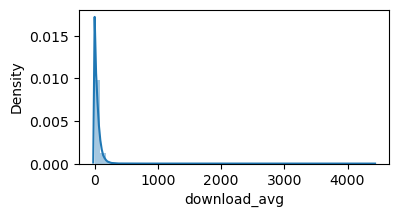

In [17]:
plt.figure(figsize=(4,2))
sns.distplot(data['download_avg'])

<AxesSubplot:xlabel='upload_avg', ylabel='Density'>

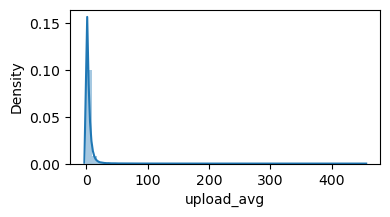

In [18]:
plt.figure(figsize=(4,2))
sns.distplot(data['upload_avg'])

In [19]:
data.isnull().mean()*100

id                              0.000000
is_tv_subscriber                0.000000
is_movie_package_subscriber     0.000000
subscription_age                0.000000
bill_avg                        0.000000
reamining_contract             29.847525
service_failure_count           0.000000
download_avg                    0.527161
upload_avg                      0.527161
download_over_limit             0.000000
churn                           0.000000
dtype: float64

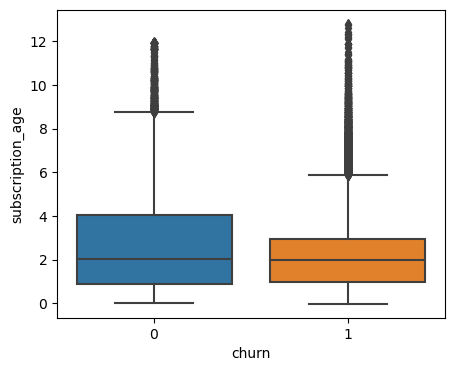

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(x="churn",y="subscription_age",data=data);plt.show() 

<Figure size 500x400 with 0 Axes>

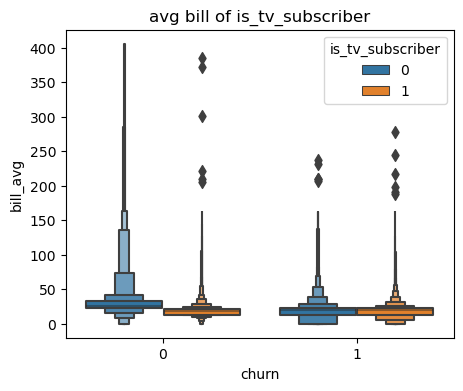

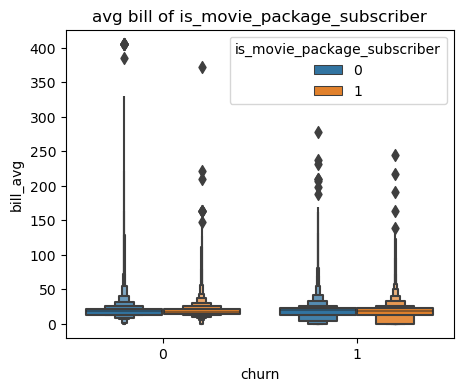

In [21]:
plt.figure(figsize=(5,4))
subscribers=["is_tv_subscriber","is_movie_package_subscriber"]
for i in subscribers:
    plt.figure(figsize=(5,4))
    sns.categorical.boxenplot(x="churn",y="bill_avg",data=data,hue=i);plt.title("avg bill of "+ i)
    plt.show()

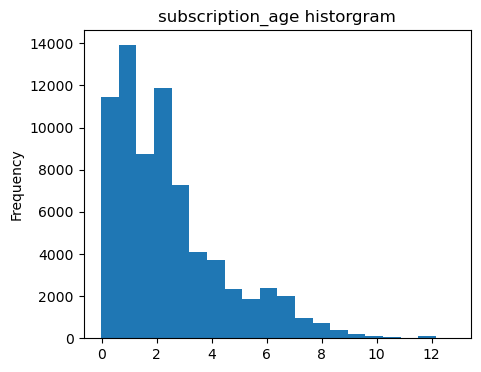

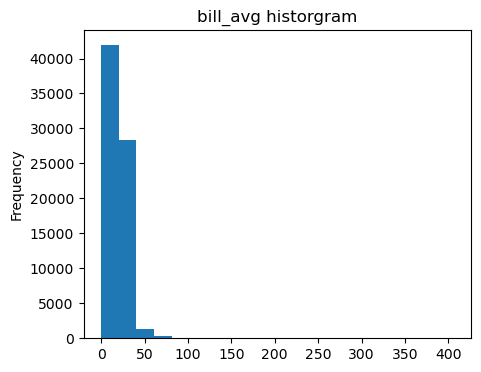

In [22]:
data.loc[:,["subscription_age","bill_avg"]]
list2=list(data.loc[:,["subscription_age","bill_avg"]].columns)
for i in list2:
    plt.figure(figsize=(5,4))
    data[i].plot.hist(bins=20,title= str(i)+ " historgram")
    plt.show()

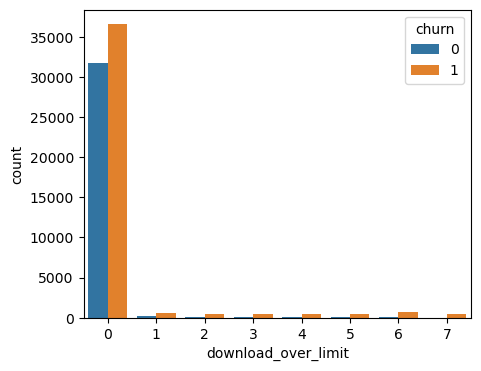

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x="download_over_limit",hue="churn",data=data);plt.show()


# If we remove null values

In [24]:
df1 = pd.read_csv("C:\\Users\\kamlesh prajapat\\OneDrive\\Desktop\\Books\\Internship\\internet_service_churn.csv")

In [25]:
df1 = df1.dropna()

In [26]:
x = df1.drop("churn",axis = "columns")
y = df1["churn"]

In [27]:
y.value_counts()

0    30044
1    20331
Name: churn, dtype: int64

## Balancing the data 

In [28]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    30044
1    30044
Name: churn, dtype: int64

## Scaling

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((42061, 10), (18027, 10))

In [30]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Decision Tree 1

In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)
y_pred_dt = dt_model.predict(x_test_scaled)

In [32]:
accuracy_score(y_true=y_test, y_pred=y_pred_dt)


0.9720974094413934

In [33]:
cm_1 = confusion_matrix(y_test, y_pred_dt)
cm_1

array([[8738,  217],
       [ 286, 8786]], dtype=int64)

In [34]:
precision_1 = precision_score(y_test, y_pred_dt)
recall_1 = recall_score(y_test, y_pred_dt)
f1_1 = f1_score(y_test, y_pred_dt)
precision_1,recall_1,f1_1

(0.9758969232478063, 0.9684744268077602, 0.9721715076071922)

# SVM 1

In [35]:
svm_model_1 = SVC()
svm_model_1.fit(x_train_scaled, y_train)
y_pred_svm_1 = svm_model_1.predict(x_test_scaled)

In [36]:
accuracy_score(y_true=y_test, y_pred=y_pred_svm_1)

0.9212847395573307

In [37]:
cm_1 = confusion_matrix(y_test, y_pred_svm_1)
cm_1

array([[8501,  454],
       [ 965, 8107]], dtype=int64)

In [38]:
precision_1 = precision_score(y_test, y_pred_svm_1)
recall_1 = recall_score(y_test, y_pred_svm_1)
f1_1 = f1_score(y_test, y_pred_svm_1)
precision_1,recall_1,f1_1

(0.9469688120546665, 0.8936287477954145, 0.9195258889582034)

# Random Forest 1

In [39]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(x_train_scaled, y_train)
y_pred_rf_1 = rf_model_1.predict(x_test_scaled)

In [40]:
accuracy_score(y_true=y_test, y_pred=y_pred_rf_1)

0.9760914184279137

In [41]:
cm_1 = confusion_matrix(y_test, y_pred_rf_1)
cm_1

array([[8898,   57],
       [ 374, 8698]], dtype=int64)

In [42]:
precision_1 = precision_score(y_test, y_pred_rf_1)
recall_1 = recall_score(y_test, y_pred_rf_1)
f1_1 = f1_score(y_test, y_pred_rf_1)
precision_1,recall_1,f1_1

(0.993489434608795, 0.9587742504409171, 0.9758231895439502)

# Logistic Regression 1

In [43]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(x_train_scaled, y_train)
y_pred_lr_1 = lr_model_1.predict(x_test_scaled)

In [44]:
accuracy_score(y_true=y_test, y_pred=y_pred_lr_1)

0.8845620458201586

In [45]:
cm_1 = confusion_matrix(y_test, y_pred_lr_1)
cm_1

array([[8212,  743],
       [1338, 7734]], dtype=int64)

In [46]:
precision_1 = precision_score(y_test, y_pred_lr_1)
recall_1 = recall_score(y_test, y_pred_lr_1)
f1_1 = f1_score(y_test,y_pred_lr_1)
precision_1,recall_1,f1_1

(0.9123510675946679, 0.8525132275132276, 0.881417744600832)

# If we remove the column reamining_contract

In [47]:
df2 = pd.read_csv("C:\\Users\\kamlesh prajapat\\OneDrive\\Desktop\\Books\\Internship\\internet_service_churn.csv")

In [48]:
df2 = df2.drop('reamining_contract',axis='columns')

In [49]:
df2 = df2.dropna()

In [50]:
x = df2.drop("churn",axis = "columns")
y = df2["churn"]

In [51]:
y.value_counts()

1    40050
0    31843
Name: churn, dtype: int64

## Balancing the data 

In [52]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    40050
1    40050
Name: churn, dtype: int64

## Scaling

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((56070, 9), (24030, 9))

In [54]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Decision Tree 2

In [55]:
dt_model_2 = DecisionTreeClassifier()
dt_model_2.fit(x_train_scaled, y_train)
y_pred_dt_2 = dt_model_2.predict(x_test_scaled)

In [56]:
accuracy_score(y_true=y_test, y_pred=y_pred_dt_2)

0.9540990428630878

In [57]:
cm_2 = confusion_matrix(y_test, y_pred_dt_2)
cm_2

array([[11538,   515],
       [  588, 11389]], dtype=int64)

In [58]:
precision_2 = precision_score(y_test,y_pred_dt_2)
recall_2 = recall_score(y_test, y_pred_dt_2)
f1_2 = f1_score(y_test, y_pred_dt_2)
precision_2,recall_2,f1_2

(0.9567372311827957, 0.950905902980713, 0.9538126544114568)

# SVM 2

In [59]:
svm_model_2 = SVC()
svm_model_2.fit(x_train_scaled, y_train)
y_pred_svm_2 = svm_model_2.predict(x_test_scaled)

In [60]:
accuracy_score(y_true=y_test, y_pred= y_pred_svm_2)

0.8935081148564294

In [61]:
cm_2 = confusion_matrix(y_test, y_pred_svm_2)
cm_2

array([[11982,    71],
       [ 2488,  9489]], dtype=int64)

In [62]:
precision_2 = precision_score(y_test,y_pred_svm_2)
recall_2 = recall_score(y_test, y_pred_svm_2)
f1_2 = f1_score(y_test, y_pred_svm_2)
precision_2,recall_2,f1_2

(0.9925732217573222, 0.7922685146530851, 0.8811812230115614)

# Random Forest 2

In [63]:
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(x_train_scaled, y_train)
y_pred_rf_2 = rf_model_2.predict(x_test_scaled)

In [64]:
accuracy_score(y_true=y_test, y_pred= y_pred_rf_2)

0.953017062005826

In [65]:
cm_2 = confusion_matrix(y_test, y_pred_rf_2)
cm_2

array([[11957,    96],
       [ 1033, 10944]], dtype=int64)

In [66]:
precision_2 = precision_score(y_test,y_pred_rf_2)
recall_2 = recall_score(y_test, y_pred_rf_2)
f1_2 = f1_score(y_test, y_pred_rf_2)
precision_2,recall_2,f1_2

(0.991304347826087, 0.913751356767137, 0.9509492983447017)

# Logistic Regression 2

In [67]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(x_train_scaled, y_train)
y_pred_lr_2 = lr_model_2.predict(x_test_scaled)

In [68]:
accuracy_score(y_true=y_test, y_pred= y_pred_lr_2)

0.8968372867249271

In [69]:
cm_2 = confusion_matrix(y_test, y_pred_lr_2)
cm_2

array([[11983,    70],
       [ 2409,  9568]], dtype=int64)

In [70]:
precision_2 = precision_score(y_test,y_pred_lr_2)
recall_2 = recall_score(y_test, y_pred_lr_2)
f1_2 = f1_score(y_test, y_pred_lr_2)
precision_2,recall_2,f1_2

(0.992737082382237, 0.7988644902730233, 0.8853111265325005)

# If we impute missing values by KNN imputer

In [71]:
df3 = pd.read_csv("C:\\Users\\kamlesh prajapat\\OneDrive\\Desktop\\Books\\Internship\\internet_service_churn.csv")

In [72]:
knn_imputer = KNNImputer(n_neighbors=5)

data_imputed = knn_imputer.fit_transform(df3)

data_imputed = pd.DataFrame(data_imputed, columns=df3.columns)

In [73]:
x = data_imputed.drop("churn",axis = "columns")
y = data_imputed["churn"]

In [74]:
y.value_counts()

1.0    40050
0.0    32224
Name: churn, dtype: int64

## Balancing the data 

In [75]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0.0    40050
1.0    40050
Name: churn, dtype: int64

## Scaling

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((56070, 10), (24030, 10))

In [77]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Decision Tree 3

In [78]:
dt_model_3 = DecisionTreeClassifier()
dt_model_3.fit(x_train_scaled, y_train)
y_pred_dt_3 = dt_model_3.predict(x_test_scaled)

In [79]:
accuracy_score(y_true=y_test, y_pred= y_pred_dt_3)

0.953391593841032

In [80]:
cm_3 = confusion_matrix(y_test, y_pred_dt_3)
cm_3

array([[11600,   554],
       [  566, 11310]], dtype=int64)

In [81]:
precision_3 = precision_score(y_test,y_pred_dt_3)
recall_3 = recall_score(y_test, y_pred_dt_3)
f1_3 = f1_score(y_test, y_pred_dt_3)
precision_3,recall_3,f1_3

(0.953304113283884, 0.9523408555069047, 0.9528222409435553)

# SVM 3

In [82]:
svm_model_3 = SVC()
svm_model_3.fit(x_train_scaled, y_train)
y_pred_svm_3 = svm_model_3.predict(x_test_scaled)

In [83]:
accuracy_score(y_true=y_test, y_pred= y_pred_svm_3)

0.9177278401997503

In [84]:
cm_3 = confusion_matrix(y_test, y_pred_svm_3)
cm_3

array([[11915,   239],
       [ 1738, 10138]], dtype=int64)

In [85]:
precision_3 = precision_score(y_test,y_pred_svm_3)
recall_3 = recall_score(y_test, y_pred_svm_3)
f1_3 = f1_score(y_test, y_pred_svm_3)
precision_3,recall_3,f1_3

(0.976968295268382, 0.8536544291007073, 0.911158046106143)

## Random Forest 3

In [86]:
rf_model_3 = RandomForestClassifier()
rf_model_3.fit(x_train_scaled, y_train)
y_pred_rf_3 = rf_model_3.predict(x_test_scaled)

In [87]:
accuracy_score(y_true=y_test, y_pred= y_pred_rf_3)

0.9671660424469414

In [88]:
cm_3 = confusion_matrix(y_test, y_pred_rf_3)
cm_3

array([[11996,   158],
       [  631, 11245]], dtype=int64)

In [89]:
precision_3 = precision_score(y_test,y_pred_rf_3)
recall_3 = recall_score(y_test, y_pred_rf_3)
f1_3 = f1_score(y_test, y_pred_rf_3)
precision_3,recall_3,f1_3

(0.9861439971937209, 0.9468676321993937, 0.9661067915288458)

## Logistic Regression 3 

In [90]:
lr_model_3 = LogisticRegression()
lr_model_3.fit(x_train_scaled, y_train)
y_pred_lr_3 = lr_model_3.predict(x_test_scaled)

In [91]:
accuracy_score(y_true=y_test, y_pred= y_pred_lr_3)

0.9081564710778194

In [92]:
cm_3 = confusion_matrix(y_test, y_pred_lr_3)
cm_3

array([[11794,   360],
       [ 1847, 10029]], dtype=int64)

In [93]:
precision_3 = precision_score(y_test,y_pred_lr_3)
recall_3 = recall_score(y_test, y_pred_lr_3)
f1_3 = f1_score(y_test, y_pred_lr_3)
precision_3,recall_3,f1_3

(0.9653479641928964, 0.8444762546311889, 0.9008758140579384)

## Removing some features 

In [391]:
df4 = pd.read_csv("C:\\Users\\kamlesh prajapat\\OneDrive\\Desktop\\Books\\Internship\\internet_service_churn.csv")

In [392]:
df4.head(2)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1


In [393]:
df4 = df4.drop('id',axis='columns')

In [394]:
knn_imputer = KNNImputer(n_neighbors=5)

data_imputed = knn_imputer.fit_transform(df4)

data_imputed = pd.DataFrame(data_imputed, columns=df4.columns)

In [395]:
x = data_imputed.drop("churn",axis = "columns")
y = data_imputed["churn"]

In [396]:
y.value_counts()

1.0    40050
0.0    32224
Name: churn, dtype: int64

In [397]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0.0    40050
1.0    40050
Name: churn, dtype: int64

In [398]:
data_imputed.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1.0,0.0,11.95,25.0,0.140,0.0,8.4,2.3,0.0,0.0
1,0.0,0.0,8.22,0.0,0.058,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,8.91,16.0,0.000,0.0,13.7,0.9,0.0,1.0
3,0.0,0.0,6.87,21.0,0.196,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,6.39,0.0,0.342,0.0,0.0,0.0,0.0,1.0


In [399]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((64080, 9), (16020, 9))

In [400]:
print(x_train)

       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
28152               1.0                          1.0          5.110000   
73447               1.0                          1.0          6.831665   
58065               1.0                          0.0          1.640000   
49900               1.0                          1.0          2.520000   
19734               1.0                          0.0          0.280000   
...                 ...                          ...               ...   
21243               1.0                          1.0          0.850000   
45891               1.0                          0.0          2.630000   
42613               1.0                          0.0          2.980000   
43567               1.0                          1.0          2.890000   
68268               0.0                          0.0          0.260000   

       bill_avg  reamining_contract  service_failure_count  download_avg  \
28152      24.0               0.904

In [401]:
from sklearn.ensemble import ExtraTreesClassifier


In [402]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

print(model.feature_importances_)

[0.08642673 0.0512734  0.09484309 0.09422793 0.47920839 0.01457862
 0.09422349 0.06847301 0.01674533]


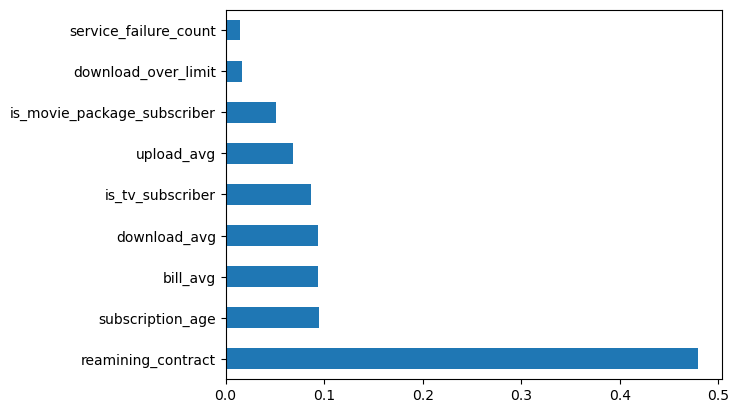

In [403]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [404]:
print(x_train)

       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
28152               1.0                          1.0          5.110000   
73447               1.0                          1.0          6.831665   
58065               1.0                          0.0          1.640000   
49900               1.0                          1.0          2.520000   
19734               1.0                          0.0          0.280000   
...                 ...                          ...               ...   
21243               1.0                          1.0          0.850000   
45891               1.0                          0.0          2.630000   
42613               1.0                          0.0          2.980000   
43567               1.0                          1.0          2.890000   
68268               0.0                          0.0          0.260000   

       bill_avg  reamining_contract  service_failure_count  download_avg  \
28152      24.0               0.904

In [405]:
x_train = x_train.drop(['service_failure_count',  'download_over_limit'], 
             axis = 1)

x_test = x_test.drop(['service_failure_count',  'download_over_limit'], 
             axis = 1)



In [406]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Decision Tree 

In [407]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)
y_pred_dt = dt_model.predict(x_test_scaled)

In [408]:
d_tree_acc = accuracy_score(y_true=y_test, y_pred= y_pred_dt)
d_tree_acc

0.8946317103620475

In [409]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[7215,  849],
       [ 839, 7117]], dtype=int64)

In [410]:
d_tree_pre = precision_score(y_test,y_pred_dt)
d_tree_rec = recall_score(y_test, y_pred_dt)
d_tree_f1 = f1_score(y_test, y_pred_dt)
d_tree_pre,d_tree_rec,d_tree_f1                      

(0.893422043685664, 0.894544997486174, 0.8939831679437257)

# SVM

In [411]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)

In [412]:
svc_accuracy = accuracy_score(y_true=y_test, y_pred= y_pred_svm)
svc_accuracy

0.8747191011235955

In [413]:
cm = confusion_matrix(y_test, y_pred_svm)
cm                                             

array([[7355,  709],
       [1298, 6658]], dtype=int64)

In [414]:
svc_pre = precision_score(y_test,y_pred_svm)
svc_rec = recall_score(y_test, y_pred_svm)
svc_f1 = f1_score(y_test, y_pred_svm)
svc_pre,svc_rec,svc_f1

(0.9037600108592372, 0.8368526897938663, 0.8690204268093715)

# Random Forest

In [415]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)

In [416]:
random_acc = accuracy_score(y_true=y_test, y_pred= y_pred_rf)
random_acc

0.9252184769038702

In [417]:
cm = confusion_matrix(y_test, y_pred_rf)         
cm

array([[7678,  386],
       [ 812, 7144]], dtype=int64)

In [418]:
random_pre = precision_score(y_test,y_pred_rf)
random_rec = recall_score(y_test, y_pred_rf)
random_f1 = f1_score(y_test, y_pred_rf)
random_pre,random_rec,random_f1

(0.948738379814077, 0.897938662644545, 0.9226398036936588)

# Logistic Regression

In [419]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
y_pred_lr = lr_model.predict(x_test_scaled)

In [420]:
log_accuracy = accuracy_score(y_true=y_test, y_pred= y_pred_lr)
log_accuracy

0.8435081148564295

In [421]:
cm = confusion_matrix(y_test, y_pred_lr)
cm                                            

array([[6671, 1393],
       [1114, 6842]], dtype=int64)

In [422]:
log_pre = precision_score(y_test,y_pred_lr)
log_rec = recall_score(y_test, y_pred_lr)
log_f1 = f1_score(y_test, y_pred_lr)
log_accuracy,log_rec,log_f1

(0.8435081148564295, 0.8599798893916542, 0.8451608918534989)

In [423]:
performance = {'Accuracy_Score':[d_tree_acc, svc_accuracy,random_acc,log_accuracy],
              'Precision':[d_tree_pre, svc_pre,random_pre,log_pre],
              'Recall': [d_tree_rec, svc_rec,random_rec,log_rec],
              'f1_score':[d_tree_f1,svc_f1,random_f1,log_f1]}

In [424]:
performance_df = pd.DataFrame(data = performance, index= ['DecisionTree','SVC','RandomForest','Logistic Regression'])

In [425]:
performance_df

,Accuracy_Score,Precision,Recall,f1_score
DecisionTree,0.894632,0.893422,0.894545,0.893983
SVC,0.874719,0.903760,0.836853,0.869020
RandomForest,0.925218,0.948738,0.897939,0.922640
Logistic Regression,0.843508,0.830844,0.859980,0.845161


Text(0, 0.5, 'Metrics')

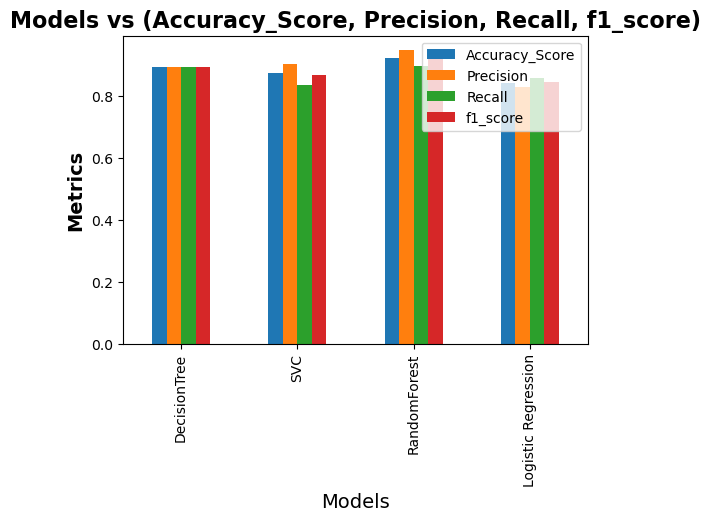

In [428]:
performance_df.plot(kind="bar", figsize=(6, 4))
plt.title('Models vs (Accuracy_Score, Precision, Recall, f1_score)', fontdict={'weight': 'bold', 'size': 16})
plt.xlabel('Models', fontdict={'size': 14})
plt.ylabel('Metrics', fontdict={'size': 14, 'weight': 'bold'})